In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

H0: M1=M2

H1: M1!=M2

In [8]:
# Data Type 1
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
     25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
            32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A", "B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
#Data Type 2
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
     25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
            32,33,33,33,31,32,33,26,32,33,29])

# A
group_A = np.arange(len(A))
group_A = pd.DataFrame(group_A)
group_A[:] = "A"
A = pd.concat([A, group_A], axis = 1)


# B
group_B = np.arange(len(B))
group_B = pd.DataFrame(group_B)
group_B[:] = "B"
B = pd.concat([B, group_B], axis = 1)

# Data
AB = pd.concat([A, B])
AB.columns = ["income", "group"]

print(AB.head())
print(AB.tail())

   income group
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    income group
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


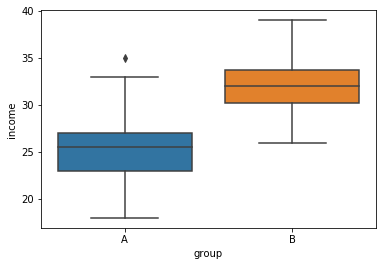

In [15]:
sns.boxplot(x = "group", y = "income", data = AB);

In [16]:
# Normality Assumption
from scipy.stats import shapiro

In [17]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [18]:
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [19]:
# Variance Homogeneity Assumption

H0: Variances are homogeneous

H1: Variances are not homogeneous

In [22]:
from scipy.stats import levene
levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [39]:
# Hypothesis Testing
from scipy import stats

test_statistics, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)
print("Test Statistics = %.4f, P_value = %.4f" % (test_statistics, pvalue))

Test Statistics = -7.0287, P_value = 0.0000


### Nonparametric Independent Two-Sample T Test

In [37]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [42]:
test_statistics, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print("Test Statistics = %.4f, P_value = %.4f" % (test_statistics, pvalue))

Test Statistics = 89.5000, P_value = 0.0000
